In [1]:
import torch 
from torchvision import transforms,datasets
from torch.autograd.variable import Variable
from torch import optim 
from torch import nn 

batches=256

In [2]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        self.n_features=128
        self.out_features=28*28

        self.hidden0=nn.Sequential(
            nn.Linear(self.n_features,256),
            nn.LeakyReLU(0.2)
        )

        self.hidden1=nn.Sequential(
            nn.Linear(256,512),
            nn.LeakyReLU(0.2)
        )

        self.hidden2=nn.Sequential(
            nn.Linear(512,1024),
            nn.LeakyReLU(0.2)
        )

        self.out=nn.Sequential(
            nn.Linear(1024,self.out_features),
            nn.Tanh()
        )
    
    def forward(self,x):
        x=self.hidden0(x)
        x=self.hidden1(x)
        x=self.hidden2(x)
        return self.out(x)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.n_features=28*28
        self.out_features=1

        self.hidden0=nn.Sequential(
            nn.Linear(self.n_features,1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden1=nn.Sequential(
            nn.Linear(1024,512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden2=nn.Sequential(
            nn.Linear(512,256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.out=nn.Sequential(
            nn.Linear(256,self.out_features),
            nn.Sigmoid()
        )
    
    def forward(self,x):
        x=self.hidden0(x)
        x=self.hidden1(x)
        x=self.hidden2(x)
        return self.out(x)



In [3]:


def load_mnist_data():
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5),(0.5)),
        torch.flatten
    ])
    out_dir="./dataset"
    return datasets.MNIST(root=out_dir,
                        train=True,
                        transform=transform,
                        download=True
                        )
data=load_mnist_data()
data_loader=torch.utils.data.DataLoader(dataset=data,batch_size=batches,shuffle=True)
num_batcher=len(data_loader)

discriminator=Discriminator()
generator=Generator()

if torch.cuda.is_available():
    discriminator.cuda()
    generator.cuda()

##Optimizer

d_optimizer=optim.Adam(discriminator.parameters(),lr=0.00002)
g_optimizer=optim.Adam(generator.parameters(),lr=0.000002)

#Binaty cross entropy 

loss=nn.BCELoss()


Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw



Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw



Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
is_cuda=torch.cuda.is_available()
def generate_noise(x,y):
  if is_cuda:
    return torch.rand(x,y).cuda()
  return torch.randn(x,y)

def get_ones(x):
  if is_cuda:
    return torch.ones(x,1).cuda()
  
  return torch.ones(x,1)

def get_zeros(x):
  if is_cuda:
    return torch.zeros(x,1).cuda()
  return torch.zeros(x,1)


In [5]:
from matplotlib import pyplot as plt
def plot_image():
  if is_cuda:
        plt.imshow(generator(generate_noise(1, 128)).cpu().detach().view(28,28).numpy(), cmap=cm.gray)
  else:
        plt.imshow(generator(generate_noise(1, 128)).detach().view(28,28).numpy(), cmap=cm.gray)
  plt.show()


In [6]:
discriminator_errors=[]
generator_errors=[]
dx=[]
gx=[]
from matplotlib import cm

In [7]:
epochs=1000

Epoch:0---Dx:214.60934448242188---Gx:105.02044677734375---Derr:165.31724548339844---Gerr:191.5681915283203


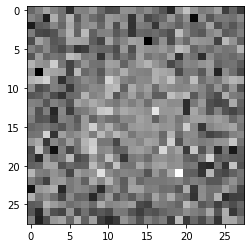

Epoch:1---Dx:234.52664184570312---Gx:49.000553131103516---Derr:56.17207336425781---Gerr:383.6473388671875
Epoch:2---Dx:234.99185180664062---Gx:14.183767318725586---Derr:14.74903678894043---Gerr:694.6611328125
Epoch:3---Dx:235.0---Gx:3.6101467609405518---Derr:3.644517660140991---Gerr:1012.52783203125
Epoch:4---Dx:235.0---Gx:1.3896509408950806---Derr:1.3948230743408203---Gerr:1239.015380859375
Epoch:5---Dx:235.0---Gx:0.6628570556640625---Derr:0.6640409231185913---Gerr:1413.149169921875
Epoch:6---Dx:235.0---Gx:0.41295209527015686---Derr:0.413426011800766---Gerr:1528.0799560546875
Epoch:7---Dx:235.0---Gx:0.27009451389312744---Derr:0.27030375599861145---Gerr:1631.15234375
Epoch:8---Dx:235.0---Gx:0.20773354172706604---Derr:0.2078612744808197---Gerr:1695.5723876953125
Epoch:9---Dx:234.99046325683594---Gx:0.1646076738834381---Derr:0.18153725564479828---Gerr:1779.426025390625
Epoch:10---Dx:234.95433044433594---Gx:0.34470319747924805---Derr:0.4388554096221924---Gerr:1731.461181640625
Epoch:11---

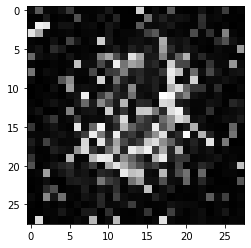

Epoch:101---Dx:234.8423309326172---Gx:0.1951562762260437---Derr:0.7268472909927368---Gerr:4227.22607421875
Epoch:102---Dx:234.8724365234375---Gx:0.1671505719423294---Derr:0.5279127955436707---Gerr:4026.916259765625
Epoch:103---Dx:234.88645935058594---Gx:0.14366793632507324---Derr:0.47602322697639465---Gerr:4241.666015625
Epoch:104---Dx:234.8715057373047---Gx:0.1416103094816208---Derr:0.5455094575881958---Gerr:4620.2646484375
Epoch:105---Dx:234.87852478027344---Gx:0.13571210205554962---Derr:0.5033645033836365---Gerr:4627.45751953125
Epoch:106---Dx:234.88229370117188---Gx:0.14261233806610107---Derr:0.6338014006614685---Gerr:4231.9111328125
Epoch:107---Dx:234.84625244140625---Gx:0.16010496020317078---Derr:0.5748625993728638---Gerr:4082.3291015625
Epoch:108---Dx:234.8989715576172---Gx:0.12485434114933014---Derr:0.4889160394668579---Gerr:4294.99560546875
Epoch:109---Dx:234.87962341308594---Gx:0.12733976542949677---Derr:0.5228685140609741---Gerr:4282.7802734375
Epoch:110---Dx:234.91142272949

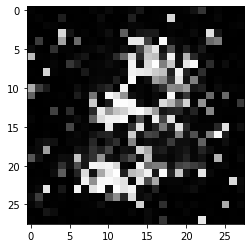

Epoch:201---Dx:234.90782165527344---Gx:0.10595861077308655---Derr:0.42948243021965027---Gerr:5128.88134765625
Epoch:202---Dx:234.91015625---Gx:0.09031517803668976---Derr:0.34172409772872925---Gerr:5905.32958984375
Epoch:203---Dx:234.87429809570312---Gx:0.12621919810771942---Derr:0.5744732618331909---Gerr:4596.3076171875
Epoch:204---Dx:234.86953735351562---Gx:0.13598009943962097---Derr:0.535942792892456---Gerr:4403.2900390625
Epoch:205---Dx:234.87216186523438---Gx:0.14153115451335907---Derr:0.6062453985214233---Gerr:4607.83203125
Epoch:206---Dx:234.89634704589844---Gx:0.12686821818351746---Derr:0.3840450346469879---Gerr:4532.80419921875
Epoch:207---Dx:234.85964965820312---Gx:0.17022007703781128---Derr:0.6006277203559875---Gerr:4054.259033203125
Epoch:208---Dx:234.89947509765625---Gx:0.10571637004613876---Derr:0.4136626422405243---Gerr:5043.47216796875
Epoch:209---Dx:234.8856964111328---Gx:0.12586534023284912---Derr:0.4634456932544708---Gerr:4562.85693359375
Epoch:210---Dx:234.8939819335

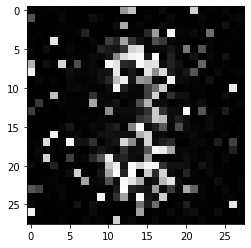

Epoch:301---Dx:234.86257934570312---Gx:0.15237069129943848---Derr:0.5764204859733582---Gerr:4373.5830078125
Epoch:302---Dx:234.904541015625---Gx:0.1206682100892067---Derr:0.4383889436721802---Gerr:4190.59521484375
Epoch:303---Dx:234.86863708496094---Gx:0.14685487747192383---Derr:0.7843394875526428---Gerr:4584.11474609375
Epoch:304---Dx:234.89944458007812---Gx:0.1273360699415207---Derr:0.44319725036621094---Gerr:4083.1044921875
Epoch:305---Dx:234.89820861816406---Gx:0.11909584701061249---Derr:0.5540462136268616---Gerr:4170.205078125
Epoch:306---Dx:234.90771484375---Gx:0.11116082221269608---Derr:0.44829967617988586---Gerr:4521.947265625
Epoch:307---Dx:234.93466186523438---Gx:0.07553141564130783---Derr:0.338248610496521---Gerr:5999.7353515625
Epoch:308---Dx:234.8805694580078---Gx:0.1107870489358902---Derr:0.594393789768219---Gerr:4621.693359375
Epoch:309---Dx:234.91661071777344---Gx:0.08313699811697006---Derr:0.33312177658081055---Gerr:5883.27587890625
Epoch:310---Dx:234.86270141601562---

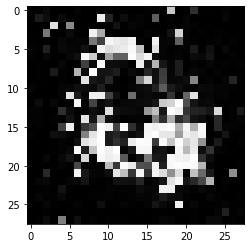

Epoch:401---Dx:234.89413452148438---Gx:0.09665024280548096---Derr:0.550744891166687---Gerr:5034.54736328125
Epoch:402---Dx:234.9148712158203---Gx:0.08857965469360352---Derr:0.3651137948036194---Gerr:3810.272705078125
Epoch:403---Dx:234.90875244140625---Gx:0.11442409455776215---Derr:0.35665053129196167---Gerr:3572.86474609375
Epoch:404---Dx:234.9027099609375---Gx:0.09785022586584091---Derr:0.46346545219421387---Gerr:4351.974609375
Epoch:405---Dx:234.8951416015625---Gx:0.12187732756137848---Derr:0.6329208612442017---Gerr:4275.728515625
Epoch:406---Dx:234.92791748046875---Gx:0.08248791098594666---Derr:0.3277226984500885---Gerr:4795.76513671875
Epoch:407---Dx:234.93466186523438---Gx:0.07291963696479797---Derr:0.34949561953544617---Gerr:4987.50439453125
Epoch:408---Dx:234.9014434814453---Gx:0.09308017790317535---Derr:0.5503658652305603---Gerr:4730.0810546875
Epoch:409---Dx:234.90106201171875---Gx:0.09818250685930252---Derr:0.5143436789512634---Gerr:3904.220947265625
Epoch:410---Dx:234.87351

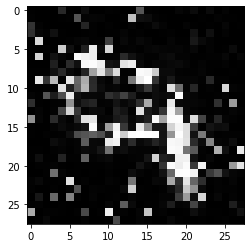

Epoch:501---Dx:234.91822814941406---Gx:0.07405762374401093---Derr:0.32904374599456787---Gerr:3510.141357421875
Epoch:502---Dx:234.91880798339844---Gx:0.0960204005241394---Derr:0.3501615524291992---Gerr:2940.042236328125
Epoch:503---Dx:234.93408203125---Gx:0.07487964630126953---Derr:0.30608659982681274---Gerr:2965.243408203125
Epoch:504---Dx:234.9341583251953---Gx:0.07421649247407913---Derr:0.282230406999588---Gerr:3703.60009765625
Epoch:505---Dx:234.9033966064453---Gx:0.09080029278993607---Derr:0.575430691242218---Gerr:4715.9912109375
Epoch:506---Dx:234.8837127685547---Gx:0.09502647817134857---Derr:0.5190207958221436---Gerr:3605.687744140625
Epoch:507---Dx:234.86920166015625---Gx:0.12064095586538315---Derr:0.5089218616485596---Gerr:3452.1044921875
Epoch:508---Dx:234.8722381591797---Gx:0.15552593767642975---Derr:0.5690383911132812---Gerr:3339.792724609375
Epoch:509---Dx:234.88876342773438---Gx:0.1366575062274933---Derr:0.5162468552589417---Gerr:3127.59765625
Epoch:510---Dx:234.916870117

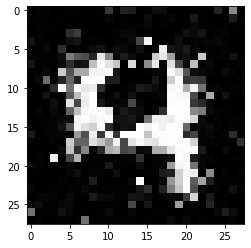

Epoch:601---Dx:234.93402099609375---Gx:0.07832645624876022---Derr:0.36667653918266296---Gerr:2698.290283203125
Epoch:602---Dx:234.94346618652344---Gx:0.05992712453007698---Derr:0.312854140996933---Gerr:2972.406494140625
Epoch:603---Dx:234.94822692871094---Gx:0.07794859260320663---Derr:0.2785749137401581---Gerr:2584.161376953125
Epoch:604---Dx:234.9506378173828---Gx:0.06527823954820633---Derr:0.4048488438129425---Gerr:4765.0302734375
Epoch:605---Dx:234.93162536621094---Gx:0.04193306714296341---Derr:0.6564692854881287---Gerr:8520.33203125
Epoch:606---Dx:234.96217346191406---Gx:0.02083168551325798---Derr:0.16954897344112396---Gerr:10115.7041015625
Epoch:607---Dx:234.98138427734375---Gx:0.016298968344926834---Derr:0.1919741928577423---Gerr:10447.837890625
Epoch:608---Dx:234.95399475097656---Gx:0.03437955677509308---Derr:0.42123112082481384---Gerr:8998.07421875
Epoch:609---Dx:234.8098602294922---Gx:0.18536396324634552---Derr:1.6524991989135742---Gerr:5172.15576171875
Epoch:610---Dx:234.8428

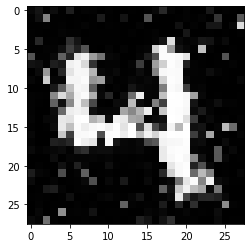

Epoch:701---Dx:234.9266357421875---Gx:0.07357629388570786---Derr:0.5801121592521667---Gerr:3022.514892578125
Epoch:702---Dx:234.90977478027344---Gx:0.0839354544878006---Derr:0.7068383097648621---Gerr:2901.588623046875
Epoch:703---Dx:234.91995239257812---Gx:0.09528236836194992---Derr:0.4842747747898102---Gerr:2412.72607421875
Epoch:704---Dx:234.9384002685547---Gx:0.07975000888109207---Derr:0.3894292414188385---Gerr:2424.79541015625
Epoch:705---Dx:234.9320526123047---Gx:0.0660652369260788---Derr:0.8334050178527832---Gerr:3593.853515625
Epoch:706---Dx:234.87452697753906---Gx:0.10385563969612122---Derr:0.6531031131744385---Gerr:2835.008056640625
Epoch:707---Dx:234.9371795654297---Gx:0.093012236058712---Derr:0.48282384872436523---Gerr:2535.764892578125
Epoch:708---Dx:234.9206085205078---Gx:0.07428863644599915---Derr:0.7614873051643372---Gerr:3151.37939453125
Epoch:709---Dx:234.9384002685547---Gx:0.084526427090168---Derr:0.4980016052722931---Gerr:2360.76220703125
Epoch:710---Dx:234.918487548

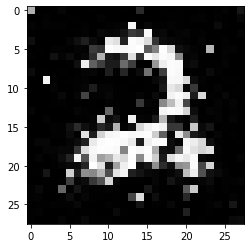

Epoch:801---Dx:234.90049743652344---Gx:0.1575889140367508---Derr:0.6092557311058044---Gerr:2668.92138671875
Epoch:802---Dx:234.89138793945312---Gx:0.11398469656705856---Derr:0.5752196907997131---Gerr:3043.169921875
Epoch:803---Dx:234.87380981445312---Gx:0.11609582602977753---Derr:0.6627301573753357---Gerr:3921.495361328125
Epoch:804---Dx:234.913818359375---Gx:0.10003218799829483---Derr:0.3963475525379181---Gerr:3322.510009765625
Epoch:805---Dx:234.88368225097656---Gx:0.11684330552816391---Derr:0.5247605443000793---Gerr:3034.880615234375
Epoch:806---Dx:234.93455505371094---Gx:0.0924050509929657---Derr:0.42673933506011963---Gerr:2919.83642578125
Epoch:807---Dx:234.93067932128906---Gx:0.08351844549179077---Derr:0.43444615602493286---Gerr:3062.062255859375
Epoch:808---Dx:234.85572814941406---Gx:0.1260284185409546---Derr:0.7089554667472839---Gerr:4327.3056640625
Epoch:809---Dx:234.82424926757812---Gx:0.18717259168624878---Derr:1.3742374181747437---Gerr:4085.808837890625
Epoch:810---Dx:234.8

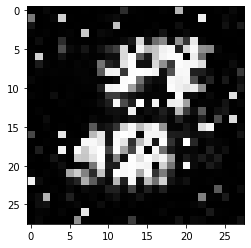

Epoch:901---Dx:234.89312744140625---Gx:0.10087434947490692---Derr:0.5534839034080505---Gerr:5756.748046875
Epoch:902---Dx:234.86102294921875---Gx:0.1309063881635666---Derr:0.5814775228500366---Gerr:4566.4794921875
Epoch:903---Dx:234.82928466796875---Gx:0.16238048672676086---Derr:0.8399960994720459---Gerr:3843.838134765625
Epoch:904---Dx:234.84527587890625---Gx:0.18642853200435638---Derr:0.6112651824951172---Gerr:2749.672607421875
Epoch:905---Dx:234.9097900390625---Gx:0.13582473993301392---Derr:0.38826388120651245---Gerr:2455.414306640625
Epoch:906---Dx:234.88905334472656---Gx:0.13860546052455902---Derr:0.491350919008255---Gerr:3174.677978515625
Epoch:907---Dx:234.85626220703125---Gx:0.1548454910516739---Derr:0.6450724601745605---Gerr:3292.64599609375
Epoch:908---Dx:234.86380004882812---Gx:0.14407245814800262---Derr:0.5451450347900391---Gerr:3288.27392578125
Epoch:909---Dx:234.88632202148438---Gx:0.13664844632148743---Derr:0.5690224170684814---Gerr:2837.398681640625
Epoch:910---Dx:234.8

In [8]:
for epoch in range(epochs):
  dx=0
  gx=0
  derr=0
  gerr=0

  for pos_samples in data_loader:
    d_optimizer.zero_grad()
    #train on real data
    pos_sample=pos_samples[0].cuda() if is_cuda else pos_sample[0]
    predict_real=discriminator(pos_sample)
    batch=predict_real.size(0)
    error_real=loss(predict_real,get_ones(batch))
    #train on fake data
    fake_samples=generator(generate_noise(batch,128))
    fake_predicts=discriminator(fake_samples)
    fake_error=loss(fake_predicts,get_zeros(batch))
    discriminator_error=fake_error+error_real

    discriminator_error.backward()
    d_optimizer.step()


    g_optimizer.zero_grad()
    gen_samples=generator(generate_noise(batch,128))
    predicts=discriminator(gen_samples)
    error=loss(predicts,get_ones(batch))

    error.backward()
    g_optimizer.step()

    derr+=discriminator_error
    gerr+=error
    dx+=predict_real.data.mean()
    gx+=fake_predicts.data.mean()

  discriminator_errors.append(dx)
  generator_errors.append(gx)
  print("Epoch:{}---Dx:{}---Gx:{}---Derr:{}---Gerr:{}".format(epoch,dx,gx,derr,gerr))
  if epoch%100==0:
    plot_image()
  
  if epoch%500==0:
    torch.save(generator,'generator{}.pth'.format(epoch))
    torch.save(discriminator,'discriminator{}.pth'.format(epoch))



No handles with labels found to put in legend.


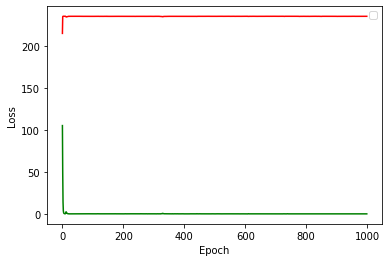

In [9]:
plt.plot(range(epochs),[x.item() for x in discriminator_errors],color='r')
plt.plot(range(epochs),[y.item() for y in generator_errors],color='g')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

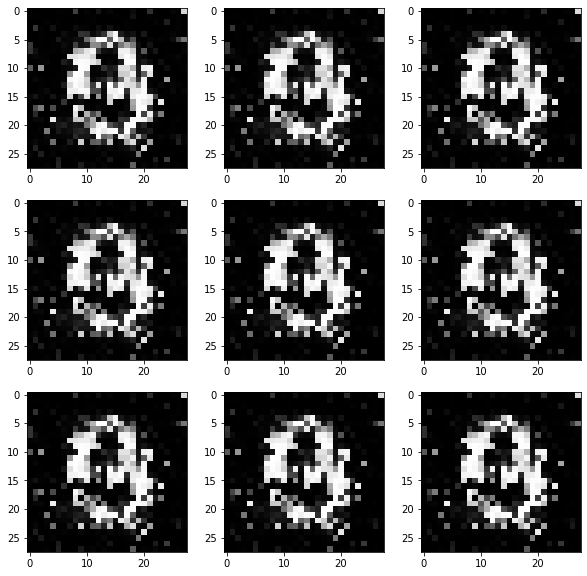

In [11]:
n_rows=3
n_cols=3
plt.figure(figsize=(10,10))
for i in range(n_rows*n_cols):
  plt.subplot(n_rows,n_cols,i+1)
  plt.imshow(generator(generate_noise(1, 128)).cpu().detach().view(28,28).numpy(), cmap=cm.gray)

plt.show()
